# - 맵플롯립을 활용한 기상정보 데이터 분석 -


In [ ]:
# 한글 폰트 설치 및 적용
# fc-cache: succeeded 확인 후 [런타임 다시 시작] 할 것.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf # 한글 폰트 깨지는 것을 방지하기 위해 실행시켜야 함

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (56.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direc

In [ ]:
# 판다스 관련 라이브러리 가져오기
import pandas as pd     # pd는 내가 붙이는 별칭
# 데이터를 데이터프레임 형태로 읽어오기
df = pd.read_csv('2022부산기온.csv', encoding='cp949')  # 판다스를 통해 csv 파일을 읽어온다, mac은 utf-8을 써줘야 함!
df.head()       # 맨 위에서 5줄만 보여줌

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
0,159,부산,2022-11-01,17.0,12.5,657.0,23.0,1217
1,159,부산,2022-11-02,16.7,12.3,554.0,23.1,1258
2,159,부산,2022-11-03,16.4,11.9,654.0,22.8,1348
3,159,부산,2022-11-04,11.6,7.5,2357.0,16.8,1519
4,159,부산,2022-11-05,10.6,5.5,537.0,17.4,1447


## - 결측치 처리
* 데이터프레임의 개요를 출력하여 결측치가 있는지 간단히 확인.
* info() 함수로 데이터프레임 df의 열별 개수와 자료형 출력

In [ ]:
# 데이터프레임 개요 확인
df.info()
# 최저기온, 최저기온 시각이 364개로 1개 모자람

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   최저기온(°C)       364 non-null    float64
 5   최저기온 시각(hhmi)  364 non-null    float64
 6   최고기온(°C)       365 non-null    float64
 7   최고기온 시각(hhmi)  365 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 22.9+ KB


## - 데이터의 일부가 빠져 결측치가 있을 경우 데이터 하나를 그 이전행 값으로 채워넣기.
## - 결측치를 대체할 때는 신중히 판단해야함!
## - 결측의 원인과 특성을 고려하여 데이터의 분포를 왜곡하지 않도록 주의!

In [ ]:
# 결측치 채우기 - 이전 행의 값과 같게 채운다
df2 = df.fillna(method='ffill') # df 원본 남기기, 비교를 위해

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   최저기온(°C)       365 non-null    float64
 5   최저기온 시각(hhmi)  365 non-null    float64
 6   최고기온(°C)       365 non-null    float64
 7   최고기온 시각(hhmi)  365 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 22.9+ KB


## - 그래프 생성
* 기온 열의 이름에는 특수문자가 있음, 사용하기 편하도록 reanme()함수를 사용하여 이름을 변경한 후 사용하자

In [ ]:
df2.rename(columns={'평균기온(°C)' : '평균기온'}, inplace=True)    # 이 행의 이름을 바꾼다
df2.rename(columns={'최고기온(°C)' : '최고기온'}, inplace=True)    # 이 행의 이름을 바꾼다
df2.rename(columns={'최저기온(°C)' : '최저기온'}, inplace=True)    # 이 행의 이름을 바꾼다

df2.head(3) # 맨 위에서 3줄만 보여줌

,지점,지점명,일시,평균기온,최저기온,최저기온 시각(hhmi),최고기온,최고기온 시각(hhmi)
0,159,부산,2022-11-01,17.0,12.5,657.0,23.0,1217
1,159,부산,2022-11-02,16.7,12.3,554.0,23.1,1258
2,159,부산,2022-11-03,16.4,11.9,654.0,22.8,1348


## - 그래프(차트) 생성하기
* x축 : 1-365

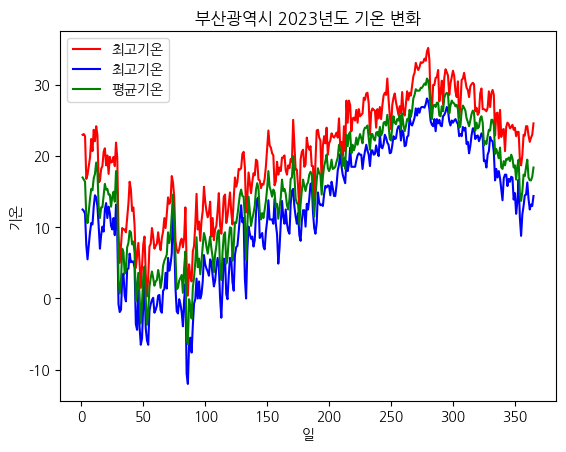

<Figure size 640x480 with 0 Axes>

In [ ]:
# 맷플롯립 관련 라이브러리 가져오기
import matplotlib.pyplot as plt # 시각화를 위해 가져와야한다

# 글꼴 설정하기
plt.rc('font', family='NanumGothic')

# 마이너스 기호가 깨지지 않도록 설정하기(영하 기온 표시)
plt.rcParams['axes.unicode_minus'] = False

# 그래프의 제목 설정하기
plt.title('부산광역시 2023년도 기온 변화')  # 라이브러리명.title('내가 설정할 제목')

# 선 그래프 그리기 (x축, y축, lable을 이용해 최고기온 표시, 색깔은 red)
plt.plot(range(1,len(df2)+1), df2['최고기온'], label='최고기온', c='r')   # range - 범위 지정 ==> range(1, 366)과 같은 의미
plt.plot(range(1,len(df2)+1), df2['최저기온'], label='최고기온', c='b')   # 색깔 파란색
plt.plot(range(1,len(df2)+1), df2['평균기온'], label='평균기온', c='g')   # 색깔 초록색

# x축과 y축 라벨 설정하기
plt.xlabel('일')   # x라벨 설정, 1부터 365까지 설정한 일
plt.ylabel('기온') # y라벨 설정

# 범례 표시하기 - label
plt.legend()

# 그래프를 화면에 출력
plt.show()

# 파일로 저장하기
plt.savefig('2023부산기온.png')

## - 3월 데이터만 추출하기
* 일시는 object 자료형이다
* 3월 데이터를 추출할 수 있도록 "연-월-일"의
* 날짜형 데이터로 변경하자!

In [ ]:
# 일시 데이터를 날짜형으로 변경하기
df2['일시'] = pd.to_datetime(df2['일시'], format='%Y-%m-%d')  # 판다스를 이용하여 datetime으로 바꾼다

df2['일시']

0     2022-11-01
1     2022-11-02
2     2022-11-03
3     2022-11-04
4     2022-11-05
         ...    
360   2023-10-27
361   2023-10-28
362   2023-10-29
363   2023-10-30
364   2023-10-31
Name: 일시, Length: 365, dtype: datetime64[ns]

In [ ]:
# 일시 열을 인덱스로 지정하기
# 일시 열은 가 행에서 교유하면서 순차로 증가하기 때문에
# 이 열을 인덱스로 지정하면 편리함
df3 = df2.set_index('일시') # 원본 유지를 위해 변수 만들기, 날짜를 가지고 작업하기

df3.head()

,지점,지점명,평균기온,최저기온,최저기온 시각(hhmi),최고기온,최고기온 시각(hhmi)
일시,,,,,,,
2022-11-01,159,부산,17.0,12.5,657.0,23.0,1217
2022-11-02,159,부산,16.7,12.3,554.0,23.1,1258
2022-11-03,159,부산,16.4,11.9,654.0,22.8,1348
2022-11-04,159,부산,11.6,7.5,2357.0,16.8,1519
2022-11-05,159,부산,10.6,5.5,537.0,17.4,1447


In [ ]:
# 3월 데이터만 추출하기
df_Mar = df3[pd.DatetimeIndex(df3.index).month==3]  # df3에 있는 것을 가져와 저장함(3월)

df_Mar

,지점,지점명,평균기온,최저기온,최저기온 시각(hhmi),최고기온,최고기온 시각(hhmi)
일시,,,,,,,
2023-03-01,159,부산,9.9,5.6,2358.0,12.2,1524
2023-03-02,159,부산,5.3,2.3,644.0,10.4,1604
2023-03-03,159,부산,7.4,1.1,518.0,14.0,1500
2023-03-04,159,부산,10.7,6.1,722.0,17.0,1248
2023-03-05,159,부산,10.6,7.2,522.0,15.7,1132
2023-03-06,159,부산,11.7,7.4,142.0,16.4,1302
2023-03-07,159,부산,13.1,9.3,555.0,18.2,1334
2023-03-08,159,부산,14.6,11.4,417.0,18.1,1303
2023-03-09,159,부산,15.3,13.1,2359.0,18.3,1317


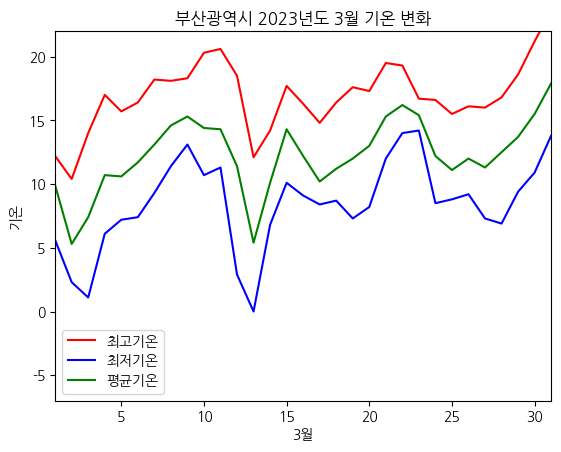

<Figure size 640x480 with 0 Axes>

In [ ]:
# 3월 기온의 선 그래프 생성하기
plt.title('부산광역시 2023년도 3월 기온 변화')  # 제목 설정

plt.plot(range(1,32), df_Mar['최고기온'], label='최고기온', c='r')
plt.plot(range(1,32), df_Mar['최저기온'], label='최저기온', c='b')
plt.plot(range(1,32), df_Mar['평균기온'], label='평균기온', c='g')

plt.xlabel('3월')
plt.ylabel('기온')

plt.xlim(1,31)      # x축 범위
plt.ylim(-7, 22)    # y축 범위

plt.legend()
plt.show()          # 그래프 출력
plt.savefig('부산광역시3월기온.png')    # 그래프를 파일형태로 저장